In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.interpolate import interp1d
import seaborn as sns
import os
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from scipy.stats import ks_2samp
import pickle
import datetime 
import warnings
import sys
from datetime import timedelta
warnings.simplefilter(action='ignore', category=FutureWarning)

# from ClassFunctions_OtherRes import precip_time_series, rainfall_analysis
sys.path.insert(0, '../')
from PlottingFunctions import *

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
all_events_5mins =[]
all_events_10mins =[]
all_events_30mins =[]
all_events_60mins =[]

total_events = 0
print(len(os.listdir("../../DanishRainData_Outputs/5mins/")))

for num, file in enumerate(np.sort(os.listdir("../../DanishRainData_Outputs/5mins/"))):
    if file != "All_events_571820_precip_minute.csv":
        # Get 5 mintue data
        df_5m = pd.read_csv(f"../../DanishRainData_Outputs/5mins/{file}")
        df_5m['event_num']=df_5m.index
        # Get rid of the trailing strings sometimes on the gauge_num
        df_5m['gauge_num'] = df_5m['gauge_num'].apply(
            lambda x: int(x.split('_')[0]) if isinstance(x, str) and x.split('_')[0].isdigit() else x)

        # Get other resolution data
        df_10m = pd.read_csv(f"../../DanishRainData_Outputs/{10}mins/{file}")
        df_30m = pd.read_csv(f"../../DanishRainData_Outputs/{30}mins/{file}")
        df_60m = pd.read_csv(f"../../DanishRainData_Outputs/{60}mins/{file}")

       # Find common event numbers in all four
        common_event_nums = (
            set(df_5m['event_num']) &
            set(df_10m['event_num']) &
            set(df_30m['event_num']) &
            set(df_60m['event_num']))

        # Filter all DataFrames to only include common events
        df_5m = df_5m[df_5m['event_num'].isin(common_event_nums)].reset_index(drop=True)
        df_10m = df_10m[df_10m['event_num'].isin(common_event_nums)].reset_index(drop=True)
        df_30m = df_30m[df_30m['event_num'].isin(common_event_nums)].reset_index(drop=True)
        df_60m = df_60m[df_60m['event_num'].isin(common_event_nums)].reset_index(drop=True)

        total_events = total_events + len(common_event_nums)
        print(f"{num} : {file}: {len(common_event_nums)} events retained across all resolutions, new total: {total_events}")    

        # Collect DataFrames into a dictionary for easy iteration
        dfs = {'5m': df_5m,
            '10m': df_10m,
            '30m': df_30m,
            '60m': df_60m}

        # Check the start and end times align
        for i in range(len(df_5m)):
            reference_start = pd.to_datetime(df_5m.iloc[i]['start_time'])
            reference_end = pd.to_datetime(df_5m.iloc[i]['end_time'])
            # print(reference_start,reference_end)
            for res, df in dfs.items():
                start = pd.to_datetime(df.iloc[i]['start_time'])
                end = pd.to_datetime(df.iloc[i]['end_time'])
                #print(res, start, end)

                delta_start = abs(start - reference_start)
                delta_end = abs(end - reference_end)

                if delta_start > timedelta(minutes=60):
                    print(f"⚠️ START mismatch in {res} at index {i}")
                    print(f"   {res} start: {start}, 5m start: {reference_start}, Δ: {delta_start}")

                if delta_end > timedelta(minutes=60):
                    print(f"⚠️ END mismatch in {res} at index {i}")
                    print(f"   {res} end: {end}, 5m end: {reference_end}, Δ: {delta_end}")

        all_events_5mins.append(df_5m)
        all_events_10mins.append(df_10m)             
        all_events_30mins.append(df_30m)
        all_events_60mins.append(df_60m)            

# all_events_df_5mins = pd.concat(all_events_5mins)   
# all_events_df_30mins = pd.concat(all_events_30mins)   
# print(len(all_events_df_5mins), len(all_events_df_30mins))
# all_events_df_30mins.reset_index(inplace=True,drop=True)

347
0 : All_events_500520_precip_minute.csv: 988 events retained across all resolutions, new total: 988
1 : All_events_500920_precip_minute.csv: 874 events retained across all resolutions, new total: 1862
2 : All_events_5012_svk_precip_minute.csv: 242 events retained across all resolutions, new total: 2104
3 : All_events_501520_precip_minute.csv: 845 events retained across all resolutions, new total: 2949
4 : All_events_5025_svk_precip_minute.csv: 2187 events retained across all resolutions, new total: 5136
5 : All_events_5027_svk_precip_minute.csv: 2306 events retained across all resolutions, new total: 7442
6 : All_events_503120_precip_minute.csv: 920 events retained across all resolutions, new total: 8362
7 : All_events_5032_svk_precip_minute.csv: 346 events retained across all resolutions, new total: 8708
8 : All_events_503520_precip_minute.csv: 907 events retained across all resolutions, new total: 9615
9 : All_events_504020_precip_minute.csv: 208 events retained across all resolu

/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/ukcp18/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (143) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/ukcp18/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (133) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


53 : All_events_5177_svk_precip_minute.csv: 2896 events retained across all resolutions, new total: 62593
54 : All_events_5178_svk_precip_minute.csv: 517 events retained across all resolutions, new total: 63110
55 : All_events_5179_svk_precip_minute.csv: 520 events retained across all resolutions, new total: 63630
56 : All_events_5180_svk_precip_minute.csv: 2280 events retained across all resolutions, new total: 65910
57 : All_events_5181_svk_precip_minute.csv: 554 events retained across all resolutions, new total: 66464
58 : All_events_5183_svk_precip_minute.csv: 546 events retained across all resolutions, new total: 67010
59 : All_events_518520_precip_minute.csv: 947 events retained across all resolutions, new total: 67957
60 : All_events_5190_svk_precip_minute.csv: 1436 events retained across all resolutions, new total: 69393
61 : All_events_5192_svk_precip_minute.csv: 3268 events retained across all resolutions, new total: 72661
62 : All_events_5195_svk_precip_minute.csv: 1186 even

132 : All_events_5407_svk_precip_minute.csv: 858 events retained across all resolutions, new total: 152818
133 : All_events_540820_precip_minute.csv: 430 events retained across all resolutions, new total: 153248
134 : All_events_5409_svk_precip_minute.csv: 887 events retained across all resolutions, new total: 154135
135 : All_events_5411_svk_precip_minute.csv: 1124 events retained across all resolutions, new total: 155259
136 : All_events_5412_svk_precip_minute.csv: 301 events retained across all resolutions, new total: 155560
137 : All_events_5413_svk_precip_minute.csv: 172 events retained across all resolutions, new total: 155732
138 : All_events_5414_svk_precip_minute.csv: 161 events retained across all resolutions, new total: 155893
139 : All_events_5415_svk_precip_minute.csv: 2897 events retained across all resolutions, new total: 158790
140 : All_events_5417_svk_precip_minute.csv: 2332 events retained across all resolutions, new total: 161122
141 : All_events_5418_svk_precip_min

209 : All_events_5615_svk_precip_minute.csv: 263 events retained across all resolutions, new total: 223716
210 : All_events_5618_svk_precip_minute.csv: 500 events retained across all resolutions, new total: 224216
211 : All_events_5619_svk_precip_minute.csv: 460 events retained across all resolutions, new total: 224676
212 : All_events_5620_svk_precip_minute.csv: 1375 events retained across all resolutions, new total: 226051
213 : All_events_5622_svk_precip_minute.csv: 526 events retained across all resolutions, new total: 226577
214 : All_events_5623_svk_precip_minute.csv: 530 events retained across all resolutions, new total: 227107
215 : All_events_5625_svk_precip_minute.csv: 3005 events retained across all resolutions, new total: 230112
216 : All_events_5628_svk_precip_minute.csv: 749 events retained across all resolutions, new total: 230861
217 : All_events_5629_svk_precip_minute.csv: 76 events retained across all resolutions, new total: 230937
218 : All_events_5630_svk_precip_min

/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/ukcp18/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (83,143) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/ukcp18/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (77,133) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


275 : All_events_5810_svk_precip_minute.csv: 2827 events retained across all resolutions, new total: 309231
276 : All_events_5815_svk_precip_minute.csv: 1849 events retained across all resolutions, new total: 311080
277 : All_events_5824_svk_precip_minute.csv: 544 events retained across all resolutions, new total: 311624
278 : All_events_5825_svk_precip_minute.csv: 1067 events retained across all resolutions, new total: 312691
279 : All_events_5830_svk_precip_minute.csv: 1064 events retained across all resolutions, new total: 313755
280 : All_events_5835_svk_precip_minute.csv: 1111 events retained across all resolutions, new total: 314866
281 : All_events_5840_svk_precip_minute.csv: 1179 events retained across all resolutions, new total: 316045
282 : All_events_5845_svk_precip_minute.csv: 2795 events retained across all resolutions, new total: 318840
283 : All_events_5849_svk_precip_minute.csv: 1158 events retained across all resolutions, new total: 319998
284 : All_events_5855_svk_pre

In [3]:
all_events_df_5mins = pd.concat(all_events_5mins)   
all_events_df_10mins = pd.concat(all_events_10mins)   
all_events_df_30mins = pd.concat(all_events_30mins)
all_events_df_60mins = pd.concat(all_events_60mins)   

for df in [all_events_df_5mins, all_events_df_10mins, all_events_df_30mins, all_events_df_60mins]:
    df.reset_index(drop=True, inplace=True)
    
print(len(all_events_df_5mins), len(all_events_df_10mins), len(all_events_df_30mins), len(all_events_df_60mins))

364479 364479 364479 364479


In [4]:
all_events_df_5mins.to_csv('all_events_df_5mins.csv', index=False)
all_events_df_10mins.to_csv('all_events_df_10mins.csv', index=False)
all_events_df_30mins.to_csv('all_events_df_30mins.csv', index=False)
all_events_df_60mins.to_csv('all_events_df_60mins.csv', index=False)


### Sense check on event length

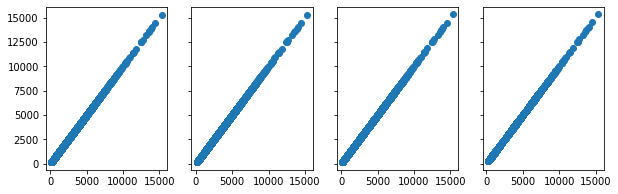

In [6]:
metric = 'duration'
fig, axs=plt.subplots(ncols=4, figsize=(10,3), sharey=True)
axs[0].scatter(all_events_df_5mins[metric], all_events_df_5mins[metric])
axs[1].scatter(all_events_df_10mins[metric], all_events_df_10mins[metric])
axs[2].scatter(all_events_df_30mins[metric], all_events_df_30mins[metric])
axs[3].scatter(all_events_df_60mins[metric], all_events_df_60mins[metric]);

### Remove rows with unrealistically high precip

In [7]:
bad_indices = all_events_df_5mins.sort_values(by="total_precip", ascending=False)[:15].index

# Drop rows at these indices from all dataframes
all_events_df_5mins = all_events_df_5mins.drop(index=bad_indices)
all_events_df_10mins = all_events_df_10mins.drop(index=bad_indices)
all_events_df_30mins = all_events_df_30mins.drop(index=bad_indices)
all_events_df_60mins = all_events_df_60mins.drop(index=bad_indices)

for df in [all_events_df_5mins, all_events_df_10mins, all_events_df_30mins, all_events_df_60mins]:
    df.reset_index(drop=True, inplace=True)
    
print(len(all_events_df_5mins), len(all_events_df_10mins), len(all_events_df_30mins), len(all_events_df_60mins))

364464 364464 364464 364464


### Specify just raw columns to keep

In [8]:
raw_cols = []
for col in all_events_df_5mins.columns:
    if not col.endswith('_DMC_10') and not col.endswith('dblnorm'):
        raw_cols.append(col)

### Also remove 'frac_q1', 'frac_q2', 'frac_q3', 'frac_q4'
Because these bring lots of nans (with current calculation method)

In [9]:
cols_to_del = ['frac_q1', 'frac_q2', 'frac_q3', 'frac_q4']
more_cols_to_del = ['gauge_num',  'start_time', 'end_time', 'duration' ,'total_precip',  'event_num', 'peak_mean_ratio_scaled',
                   'heaviest_half']

raw_cols = [x for x in raw_cols if x not in cols_to_del]  
raw_cols = [x for x in raw_cols if x not in more_cols_to_del]    

### Do the actual deleting

In [10]:
all_events_df_5mins_raw = all_events_df_5mins[raw_cols]
all_events_df_10mins_raw = all_events_df_10mins[raw_cols]
all_events_df_30mins_raw = all_events_df_30mins[raw_cols]
all_events_df_60mins_raw = all_events_df_60mins[raw_cols]

In [11]:
print(len(all_events_df_5mins_raw), len(all_events_df_10mins_raw), len(all_events_df_30mins_raw), len(all_events_df_60mins_raw))

bad_indices_all = []
for all_events_df in [all_events_df_5mins_raw, all_events_df_10mins_raw, all_events_df_30mins_raw, all_events_df_60mins_raw]:
    columns_with_nan = all_events_df.columns[all_events_df.isnull().any()].tolist()
    print("Columns with at least one NaN value:")
    print(columns_with_nan)
    # #Find indices of rows with any NaNs in the 60-minute data
    bad_indices = all_events_df[all_events_df.isnull().any(axis=1)].index
    bad_indices_lst = bad_indices.tolist()
    print(len(bad_indices_lst))
    if len(bad_indices) >0:
        bad_indices_all.extend(bad_indices_lst)
    
# Drop rows at these indices from all dataframes
all_events_df_5mins_raw = all_events_df_5mins_raw.drop(index=bad_indices_all)
all_events_df_10mins_raw = all_events_df_10mins_raw.drop(index=bad_indices_all)
all_events_df_30mins_raw = all_events_df_30mins_raw.drop(index=bad_indices_all)
all_events_df_60mins_raw = all_events_df_60mins_raw.drop(index=bad_indices_all)   

print(len(all_events_df_5mins_raw), len(all_events_df_10mins_raw), len(all_events_df_30mins_raw), len(all_events_df_60mins_raw))

364464 364464 364464 364464
Columns with at least one NaN value:
[]
0
Columns with at least one NaN value:
[]
0
Columns with at least one NaN value:
[]
0
Columns with at least one NaN value:
['asymm_d', 'Event Loading', 'lorentz_asymetry', 'Mean Intensity HIZ']
6
364458 364458 364458 364458


### Join all into one dataframe

In [12]:
metric_columns =all_events_df_5mins_raw.columns

In [13]:
all_events_df_5mins_raw = all_events_df_5mins_raw.add_suffix('_5m')
all_events_df_10mins_raw = all_events_df_10mins_raw.add_suffix('_10m')
all_events_df_30mins_raw = all_events_df_30mins_raw.add_suffix('_30m')
all_events_df_60mins_raw = all_events_df_60mins_raw.add_suffix('_60m')

In [14]:
all_events_all_res = pd.concat([all_events_df_5mins_raw, all_events_df_10mins_raw,
                               all_events_df_30mins_raw, all_events_df_60mins_raw], axis=1)

## Check skewness of variables

In [ ]:
# metric_columns = all_events_df.columns
# metric_columns = metric_columns.drop(['gauge_num', "start_time", "end_time"])
# all_events_df = all_events_df[metric_columns]

## Scale variables

In [16]:
metrics_to_scale = all_events_all_res.columns
standard_scaler = MinMaxScaler()
transformed_scaled = standard_scaler.fit_transform(all_events_all_res[metrics_to_scale])
# # Convert scaled values back to DataFrame and concatenate with original non-numeric columns
transformed_scaled = pd.DataFrame(transformed_scaled, columns=metrics_to_scale)

### Cohen's D and Instability

In [17]:
import numpy as np
from scipy.stats import spearmanr

def cohens_d(x, y):
    n1, n2 = len(x), len(y)
    s1, s2 = np.std(x, ddof=1), np.std(y, ddof=1)
    s_pooled = np.sqrt(((n1 -1)*s1**2 + (n2 -1)*s2**2) / (n1 + n2 -2))
    d = (np.mean(x) - np.mean(y)) / s_pooled
    if d<=0.2:
        meaning = "Negligible"
    elif d>0.2 and d <=0.5:
        meaning="Small"
    elif d >0.5 and d <= 0.8:
        meaning = 'Moderate'
    elif d>0.8:
        meaning = 'Large'
    return d, meaning


def instability_index(x, y):
    rho, _ = spearmanr(x, y)
    instability_index = 1 - rho
    
    if instability_index<=0.05:
        meaning = "Very low" # "Very stable"
    elif instability_index>0.05 and instability_index <=0.15:
        meaning= "Low"# "Stable"
    elif instability_index >0.15 and instability_index <= 0.35:
        meaning = 'Moderate' # 'Moderate instability'
    elif instability_index >0.35 and instability_index <= 0.60:
        meaning = "High" # 'High instability'
    elif instability_index>0.6:
        meaning = "Very high" # 'Very unstable'
    
    return instability_index, meaning

import numpy as np
from scipy.stats import mannwhitneyu

def cliffs_delta_fast(x, y):
    x = np.asarray(x)
    y = np.asarray(y)
    n_x = len(x)
    n_y = len(y)

    # Mann-Whitney U test (two-sided, but we just use U statistic)
    U, _ = mannwhitneyu(x, y, alternative='two-sided')
    # Compute delta
    delta = (2 * U) / (n_x * n_y) - 1
    abs_delta = abs(delta)

    if abs_delta < 0.147:
        meaning = "Negligible"
    elif abs_delta < 0.33:
        meaning = "Small"
    elif abs_delta < 0.474:
        meaning = "Medium"
    else:
        meaning = "Large"
    
    return abs_delta, meaning


from scipy.stats import kendalltau

def ordinal_ranking_instability(x, y):
    tau, _ = kendalltau(x, y)
    instability = 1 - tau
    if instability <= 0.05:
        meaning = "Very low"
    elif instability <= 0.15:
        meaning = "Low"
    elif instability <= 0.35:
        meaning = "Moderate"
    elif instability <= 0.60:
        meaning = "High"
    else:
        meaning = "Very high"
    return instability, meaning

# all_events_all_res = pd.concat([all_events_df_5mins_raw, all_events_df_10mins_raw], axis=1)
# all_events_all_res_columns = all_events_all_res.columns
# standard_scaler = MinMaxScaler()
# transformed_scaled = standard_scaler.fit_transform(all_events_all_res[all_events_all_res_columns])
# transformed_scaled = pd.DataFrame(transformed_scaled, columns=all_events_all_res_columns)

# Example for one metric
# for metric in metric_columns:
#     print(f"{metric}")
#     metric_fine = transformed_scaled[f"{metric}_5m"]
#     metric_coarse = transformed_scaled[f"{metric}_10m"]
#     for res in ['10m', '30m', '60m']:
#         metric_coarse = transformed_scaled[f"{metric}_{res}"]
#         d, meaning = cohens_d(metric_fine, metric_coarse)
#         instab, translation = instability_index(metric_fine, metric_coarse)
#         print(f"{res}: Sensitivity of event rankings to DMC transformation (Cohen's D): {meaning} ({d:.2f}).  \n{res} Sensitivity of event numerical meanings to DMC transformation (instability_index): {translation} ({instab:.2f}) ")

In [18]:
categorical_metric_list = []

for metric in metric_columns:
    unique_vals = all_events_df[metric].dropna().unique()
    if len(unique_vals) < 6:
        categorical_metric_list.append(metric)

print("Detected categorical metrics:", categorical_metric_list)

Detected categorical metrics: ['3rd_w_peak', '4th_w_peak', '5th_w_peak', 'third_ppr', '3rd_ARR', '3rd_rcg']


In [25]:
print("Metric & Cohen's d\\_10m & Instability\\_10m & Cohen's d\\_30m & Instability\\_30m & Cohen's d\\_60m & Instability\\_60m \\\\")

for metric in metric_columns:
    row = [metric]
    for res in ['10m', '30m', '60m']:
        metric_fine = transformed_scaled[f"{metric}_5m"]
        metric_coarse = transformed_scaled[f"{metric}_{res}"]
        d, meaning = cohens_d(metric_fine, metric_coarse)
        instab, translation = instability_index(metric_fine, metric_coarse)
        
        if metric in categorical_metric_list:
            instab_rank, meaning_rank = ordinal_ranking_instability(metric_fine, metric_coarse)
            delta, meaning_num = cliffs_delta_fast(metric_fine, metric_coarse)
            row.append(f"{meaning_rank} ({instab_rank:.2f})")
            row.append(f"{meaning_num} ({delta:.2f})")
        else:
            d, meaning = cohens_d(metric_fine, metric_coarse)
            instab, translation = instability_index(metric_fine, metric_coarse)
            row.append(f"{meaning} ({d:.2f})")
            row.append(f"{translation} ({instab:.2f})")
    print(" & ".join(row) + " \\\\")


Metric & Cohen's d\_10m & Instability\_10m & Cohen's d\_30m & Instability\_30m & Cohen's d\_60m & Instability\_60m \\
I30 & Negligible (0.01) & Very low (0.00) & Negligible (0.01) & Very low (0.01) & Negligible (-0.27) & Very low (0.05) \\
time_to_peak & Negligible (-0.00) & Low (0.11) & Negligible (-0.04) & Moderate (0.21) & Negligible (-0.03) & Moderate (0.27) \\
peak_position_ratio & Negligible (0.01) & Moderate (0.16) & Negligible (0.08) & Moderate (0.31) & Negligible (0.17) & High (0.40) \\
std & Negligible (-0.07) & Very low (0.01) & Negligible (0.03) & Very low (0.05) & Negligible (-0.26) & Low (0.10) \\
max_intensity & Negligible (0.17) & Very low (0.03) & Small (0.33) & Low (0.11) & Negligible (0.10) & Moderate (0.20) \\
mean_intensity & Negligible (-0.04) & Very low (0.00) & Negligible (-0.03) & Very low (0.00) & Negligible (-0.09) & Very low (0.01) \\
min_intensity & Small (0.43) & Very low (0.01) & Small (0.45) & Very low (0.05) & Small (0.42) & Moderate (0.22) \\
cv & Negl

In [24]:
print("Metric & Cohen's d\\_10m & Instability\\_10m & Cohen's d\\_30m & Instability\\_30m & Cohen's d\\_60m & Instability\\_60m \\\\")

for metric in metric_columns:
    row = [metric]
    for res in ['10m', '30m', '60m']:
        metric_fine = transformed_scaled[f"{metric}_5m"]
        metric_coarse = transformed_scaled[f"{metric}_{res}"]
        d, meaning = cohens_d(metric_fine, metric_coarse)
        instab, translation = instability_index(metric_fine, metric_coarse)
        row.append(f"{meaning} ({d:.2f})")
        row.append(f"{translation} ({instab:.2f})")
    print(" & ".join(row) + " \\\\")


Metric & Cohen's d\_10m & Instability\_10m & Cohen's d\_30m & Instability\_30m & Cohen's d\_60m & Instability\_60m \\
3rd_w_peak & Very low (0.03) & Negligible (0.01) \\
3rd_w_peak & Low (0.11) & Negligible (0.03) \\
3rd_w_peak & Moderate (0.21) & Negligible (0.08) \\
4th_w_peak & Very low (0.03) & Negligible (0.01) \\
4th_w_peak & Low (0.12) & Negligible (0.03) \\
4th_w_peak & Moderate (0.20) & Negligible (0.09) \\
5th_w_peak & Very low (0.04) & Negligible (0.01) \\
5th_w_peak & Low (0.13) & Negligible (0.04) \\
5th_w_peak & Moderate (0.22) & Negligible (0.11) \\
third_ppr & Moderate (0.17) & Negligible (0.00) \\
third_ppr & Moderate (0.32) & Negligible (0.04) \\
third_ppr & High (0.41) & Negligible (0.08) \\
3rd_ARR & Very low (0.02) & Negligible (0.01) \\
3rd_ARR & Low (0.07) & Negligible (0.05) \\
3rd_ARR & Low (0.13) & Negligible (0.10) \\
3rd_rcg & Very low (0.02) & Negligible (0.00) \\
3rd_rcg & Low (0.06) & Negligible (0.00) \\
3rd_rcg & Low (0.11) & Negligible (0.00) \\


/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/ukcp18/lib/python3.7/site-packages/ipykernel_launcher.py:77: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


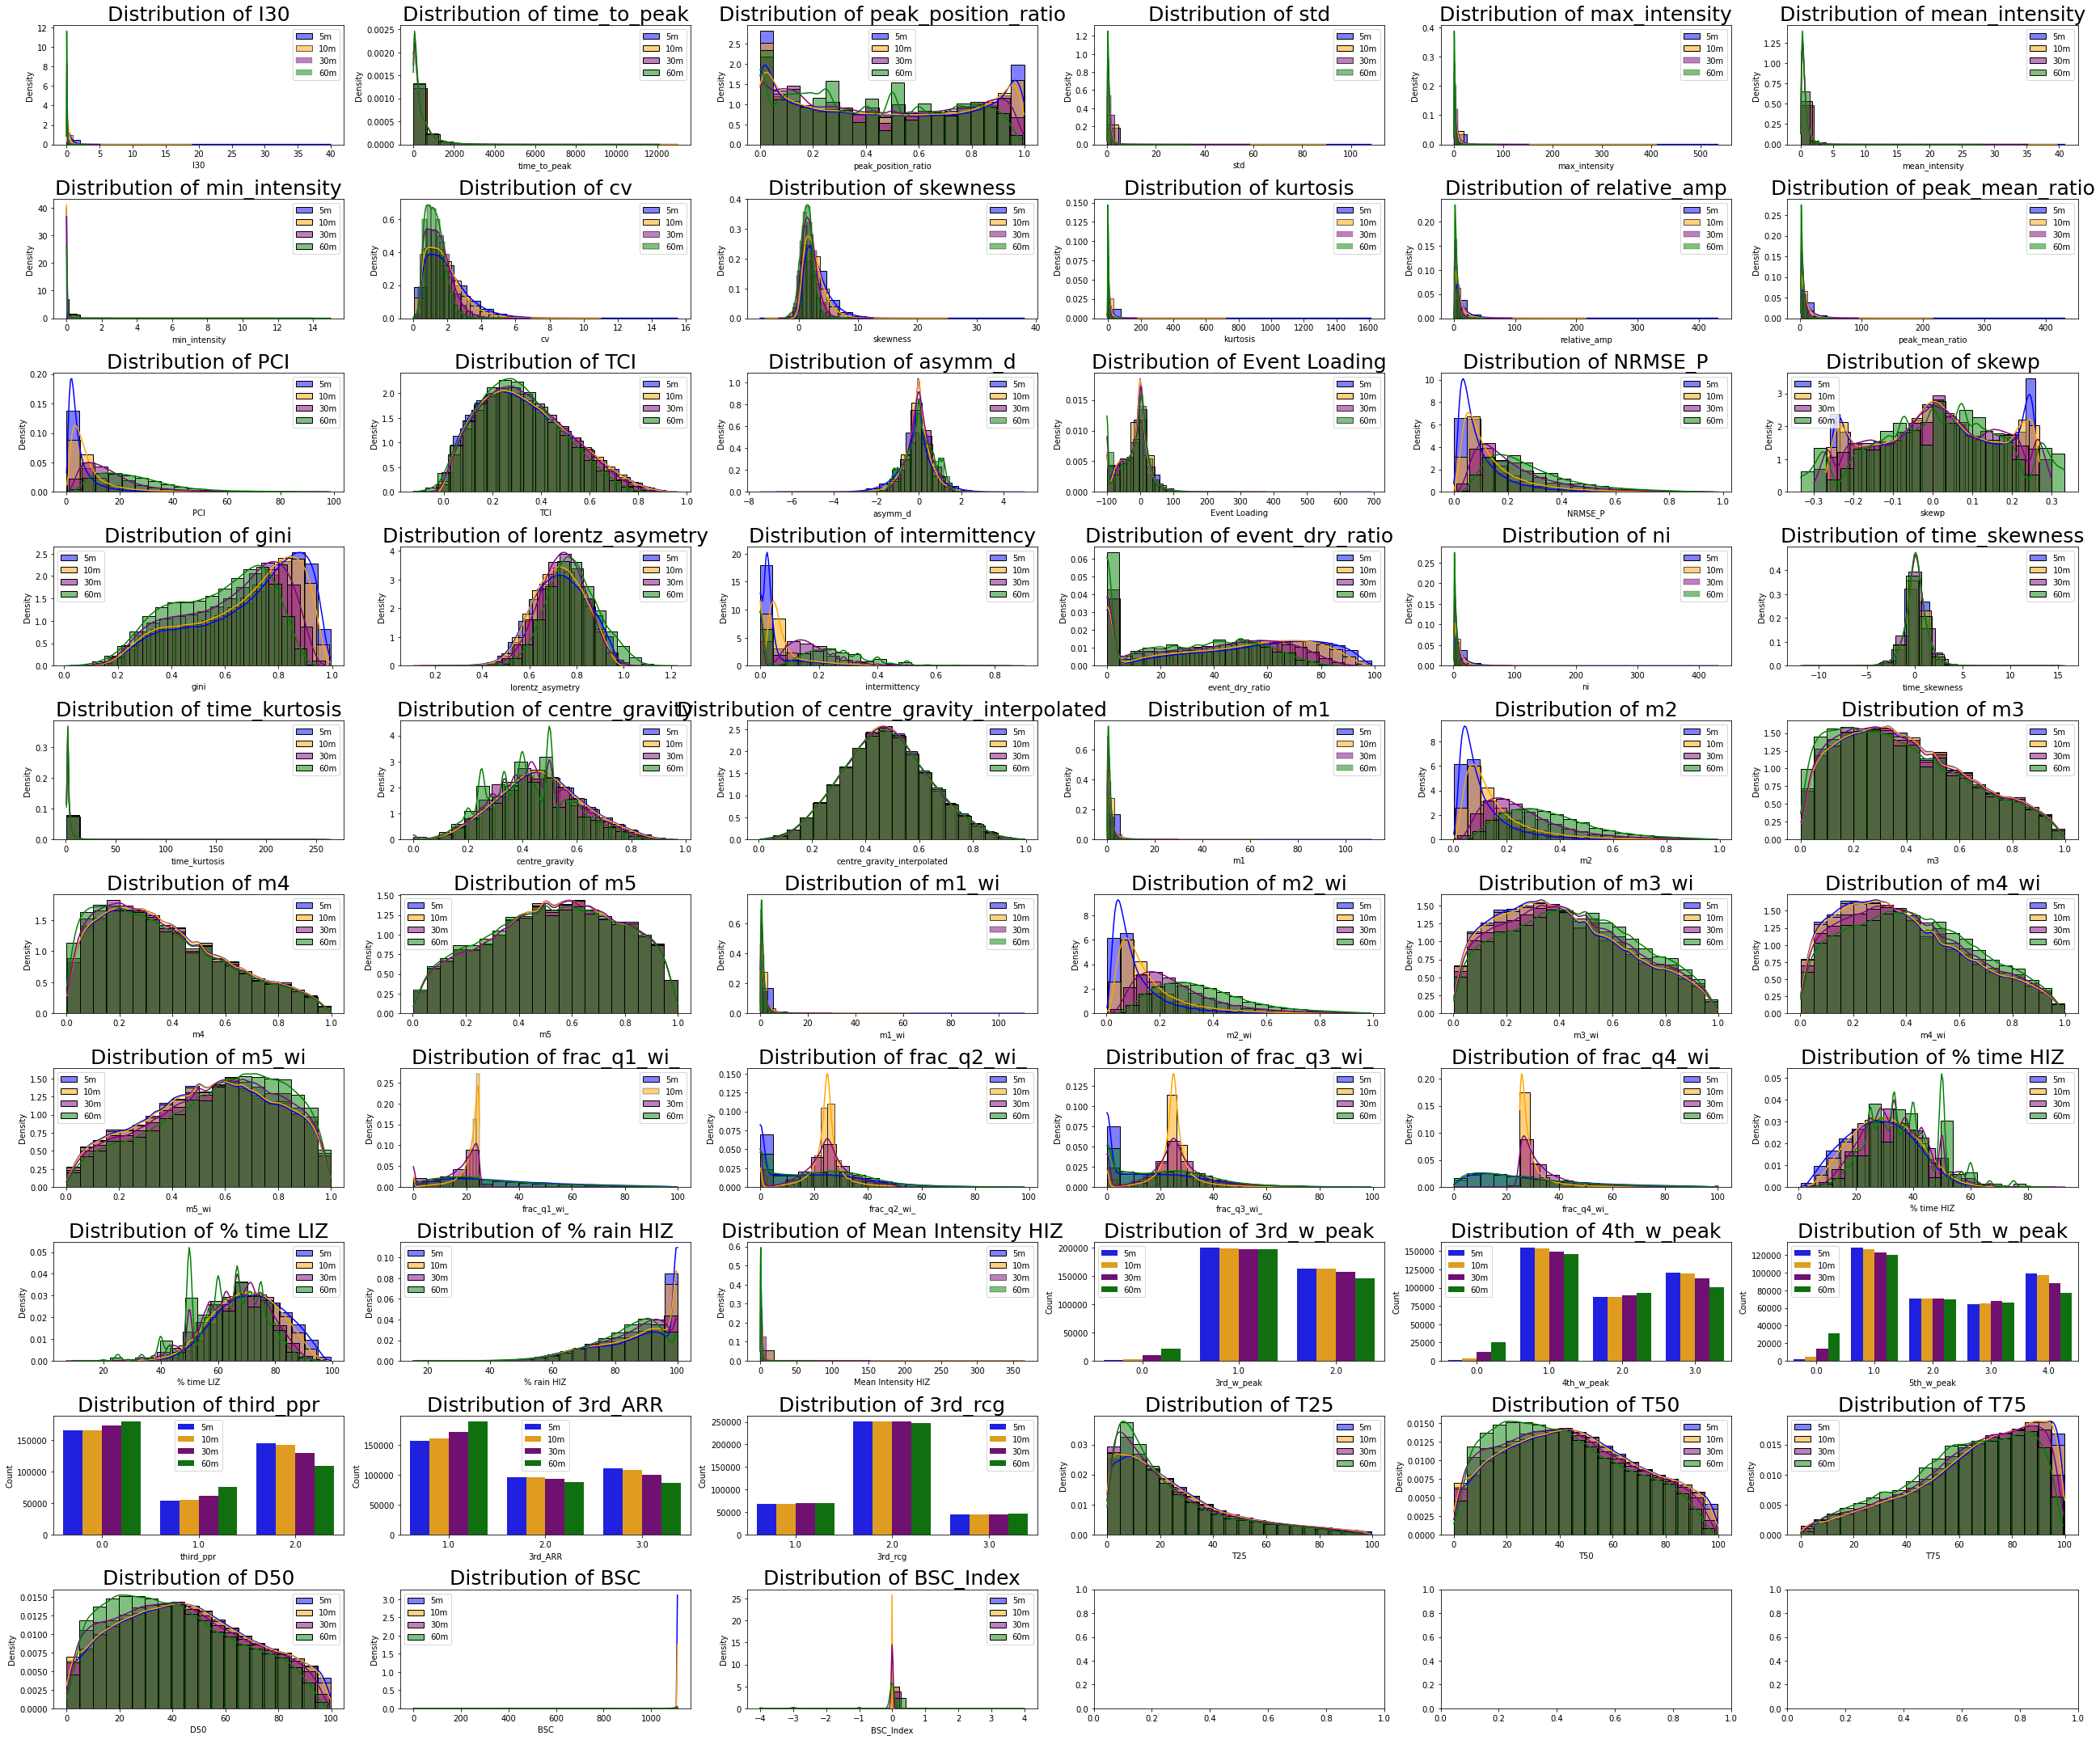

In [215]:
n_metrics = len(metric_columns)

# Define grid shape (e.g., 6 columns per row)
n_cols = 6
n_rows = int(np.ceil(n_metrics / n_cols))

# Define label order and consistent palette
label_order = list(resolutions.keys())
palette = {label: color for label, (df, color) in resolutions.items()}

# Combine all data into long format
plot_data = []
for label, (df, color) in resolutions.items():
    for metric in metric_columns:
        temp = df[[f"{metric}_{label}"]].copy()
        temp.columns = ['value']
        temp['metric'] = metric
        temp['label'] = label
        plot_data.append(temp)

long_df = pd.concat(plot_data)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 3), constrained_layout=True)
if len(metric_columns) == 1:
    axes = [axes]

axs = axes.flatten()

for idx, metric in enumerate(metric_columns):
    ax = axs[idx]
    metric_df = long_df[long_df['metric'] == metric]

    unique_vals = metric_df['value'].nunique()

    if unique_vals < 6:
        sns.countplot(
            data=metric_df,
            x='value',
            hue='label',
            palette=palette,
            hue_order=label_order,
            dodge=True,
            ax=ax
        )
        ax.set_ylabel("Count")
    else:
        for label in label_order:
            subset = metric_df[metric_df['label'] == label]
            sns.histplot(
                data=subset,
                x='value',
                stat='density',
                bins=20,
                alpha=0.5,
                color=palette[label],
                label=label,
                kde=True,
                ax=ax
            )
        ax.set_ylabel("Density")

    ax.set_title(f'Distribution of {metric}', fontsize=25)
    ax.set_xlabel(metric)

    # Set consistent legend
    handles, labels = ax.get_legend_handles_labels()
    new_labels = []
    new_handles = []
    for lbl in label_order:
        if lbl in labels:
            i = labels.index(lbl)
            new_labels.append(lbl)
            new_handles.append(handles[i])
    ax.legend(new_handles, new_labels)

plt.tight_layout()
plt.show()
fig.savefig('../Figures/histograms.png', facecolor='white', edgecolor='white')


/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/ukcp18/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


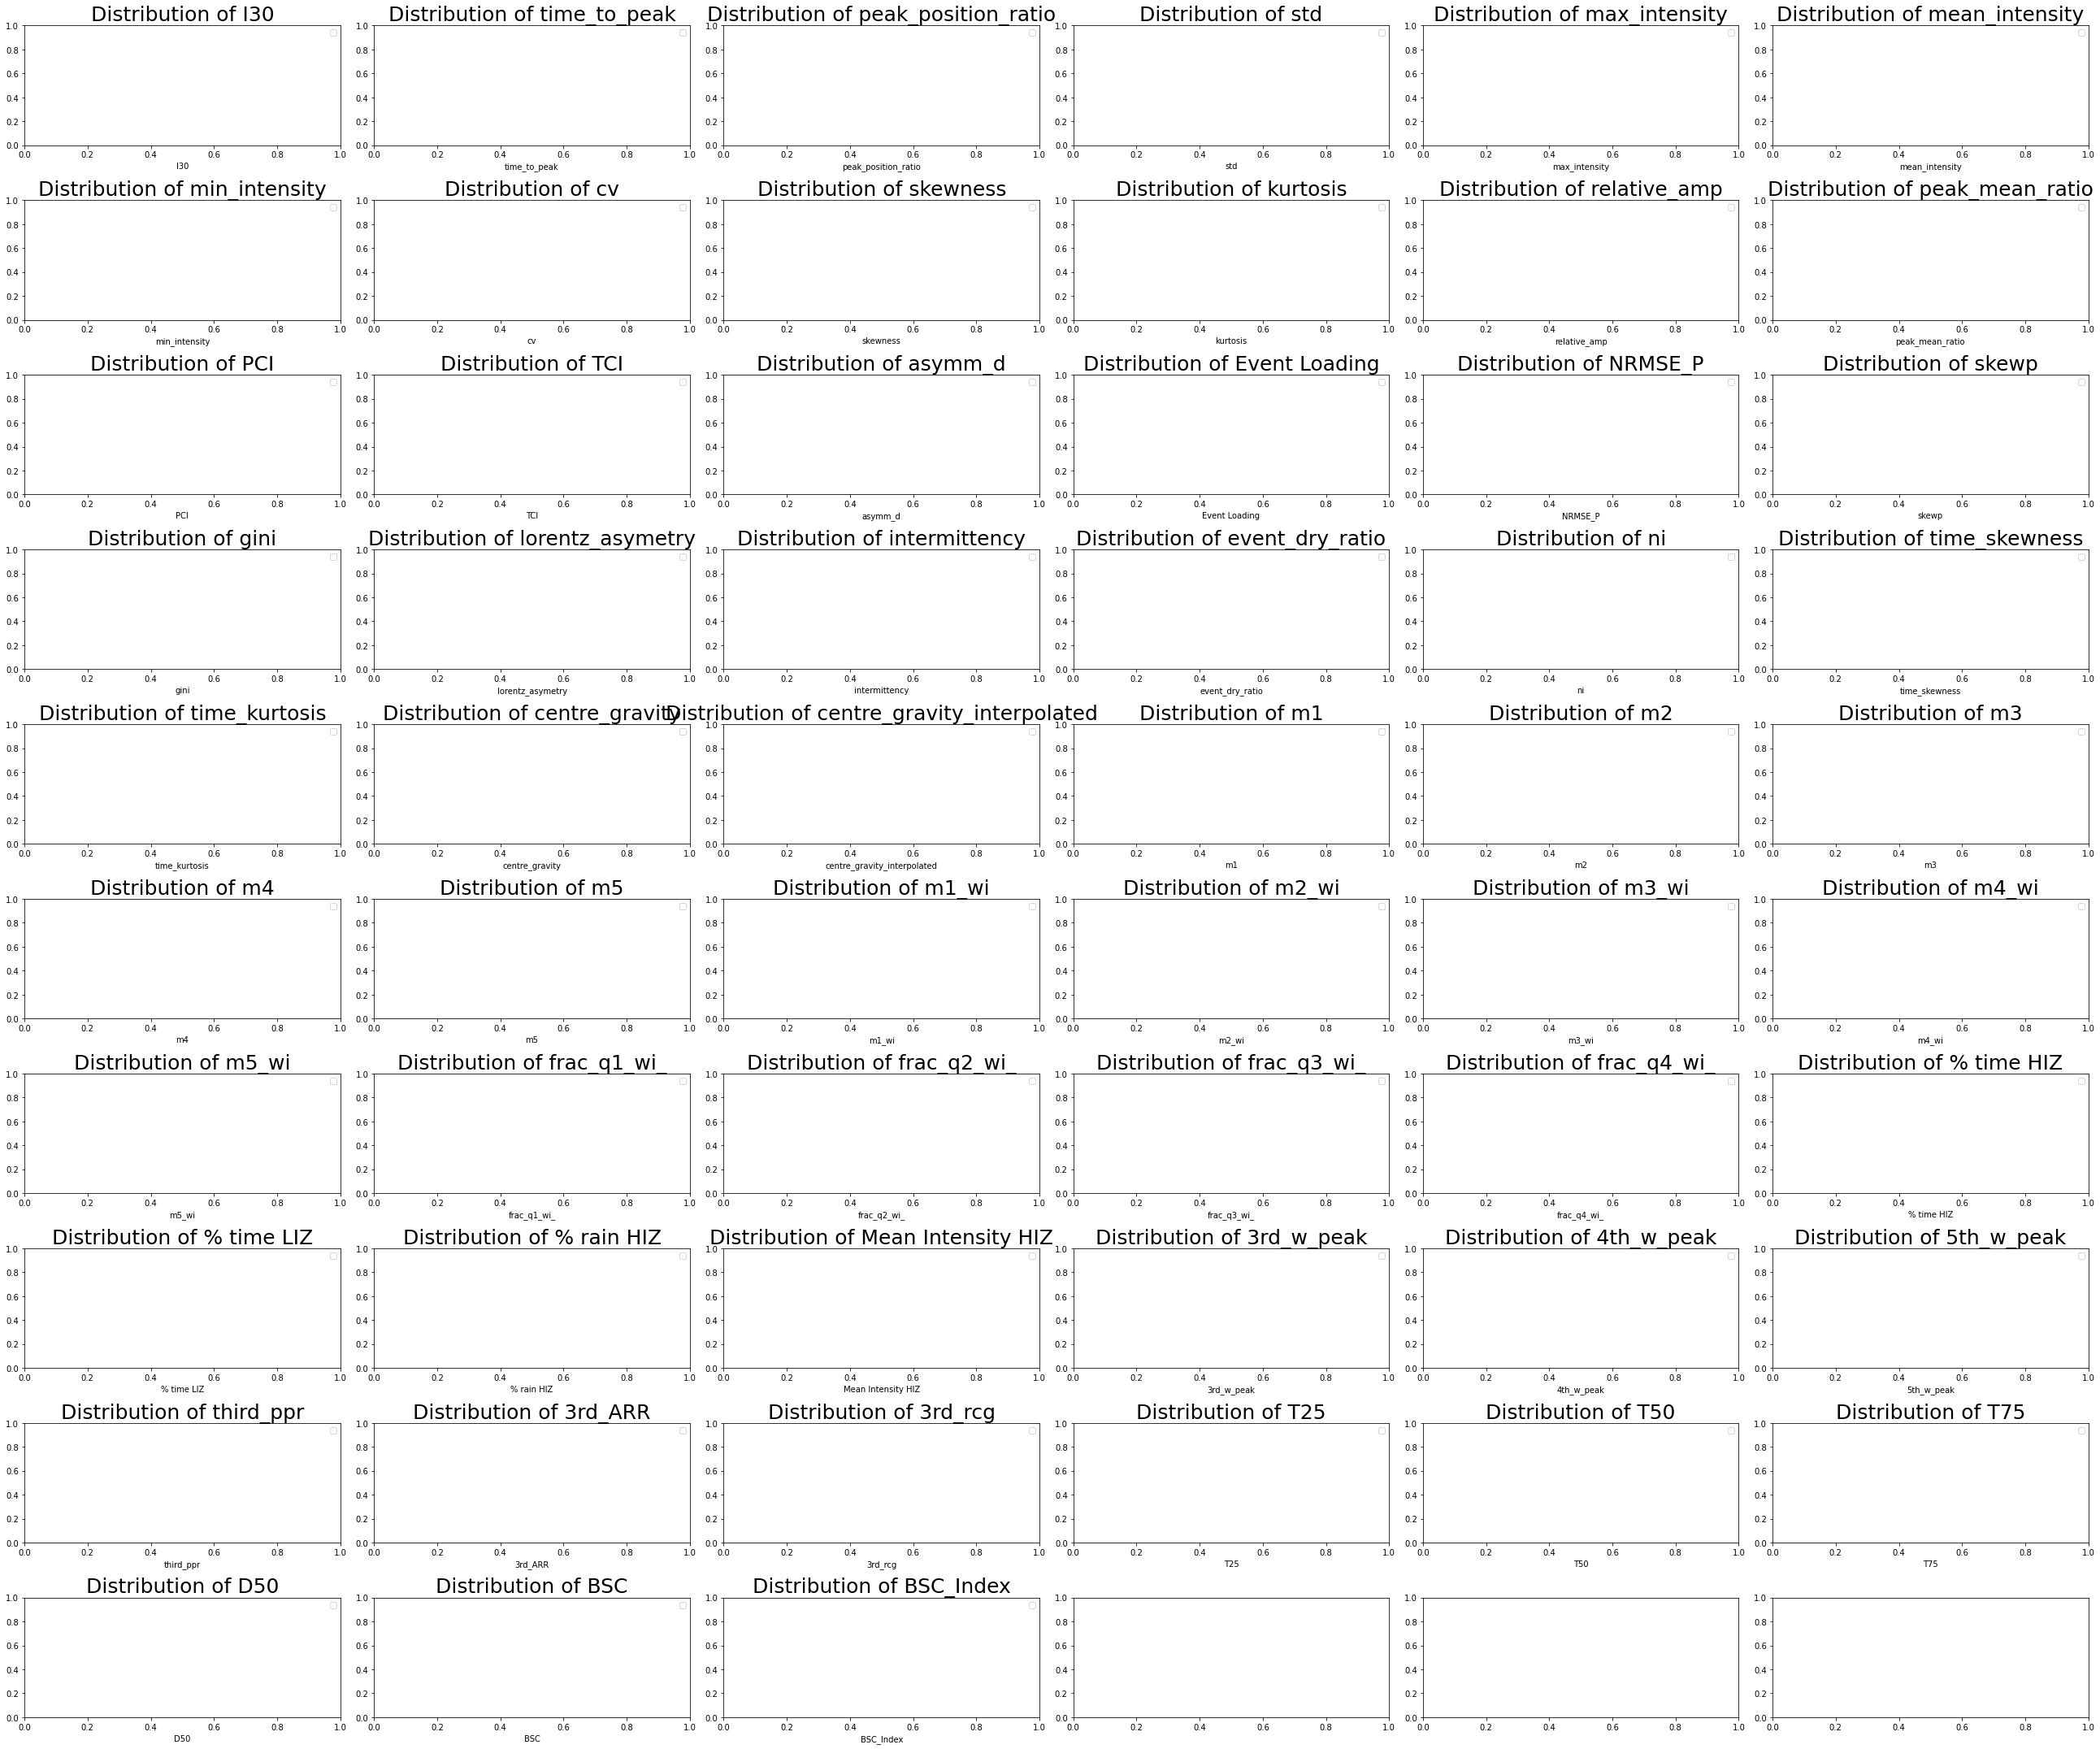

In [214]:
n_metrics = len(metric_columns)

# Define grid shape (e.g., 6 columns per row)
n_cols = 6
n_rows = int(np.ceil(n_metrics / n_cols))

# Define label order and consistent palette
label_order = list(resolutions.keys())
palette = {label: color for label, (df, color) in resolutions.items()}

# Combine all data into long format
plot_data = []
for label, (df, color) in resolutions.items():
    for metric in metric_columns:
        temp = df[[f"{metric}_{label}"]].copy()
        temp.columns = ['value']
        temp['metric'] = metric
        temp['label'] = label
        plot_data.append(temp)

long_df = pd.concat(plot_data)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 3), constrained_layout=True)
if len(metric_columns) == 1:
    axes = [axes]

axs = axes.flatten()

for idx, metric in enumerate(metric_columns):
    ax = axs[idx]
   

    ax.set_title(f'Distribution of {metric}', fontsize=25)
    ax.set_xlabel(metric)

    # Set consistent legend
    handles, labels = ax.get_legend_handles_labels()
    new_labels = []
    new_handles = []
    for lbl in label_order:
        if lbl in labels:
            i = labels.index(lbl)
            new_labels.append(lbl)
            new_handles.append(handles[i])
    ax.legend(new_handles, new_labels)

plt.tight_layout()
plt.show()
fig.savefig('../Figures/histograms.png', facecolor='white', edgecolor='white')
